# Association Rule Mining for Cassava Yield Data - Fertilizer Patterns Across Seasons

##### Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the data

In [2]:
# Loading the particular data sheet needed
df = pd.read_excel('Cassava_Yield_Data.xlsx', sheet_name='Cassava Data')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


##### Display basic information about the dataset

In [3]:
print("First few rows:")
df.head()

First few rows:


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (115, 20)


The dataset has 20 columns and 115 rows. 

In [5]:
df.isnull().sum()

Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64

The dataset has no missing values.

In [6]:
df.describe()

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


In [7]:
print("Columns:", df.columns.tolist())

Columns: ['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare']


In [8]:
print("Unique seasons:", df['Sesn'].unique())

Unique seasons: [2 1]


In [9]:
print("Unique fertilizers:", df['ferT'].unique())

Unique fertilizers: ['F2150' 'F1100' 'F3200' 'F5300' 'F4250']


There are only 5 types of the fertizers. 

In [10]:
print("Unique locations:", df['locn'].unique())

Unique locations: [1 2]


There are only 2 locations; 1 - Soroti and 2 - Mukono.

In [11]:
# Group by season, location, tillage and collect fertilizers
transactions = df.groupby(['Sesn', 'locn', 'tillage '])['ferT'].apply(list).reset_index()

In [12]:
# Prepare transaction data for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions['ferT']).transform(transactions['ferT'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [13]:
# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [14]:
# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [15]:
# Filter rules where antecedents and consequents are fertilizers (not other attributes)
rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and 'F' in str(list(x)[0]))]
rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1 and 'F' in str(list(x)[0]))]

In [16]:
# Display
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

   antecedents consequents  support  confidence  lift
0      (F2150)     (F1100)      1.0         1.0   1.0
1      (F1100)     (F2150)      1.0         1.0   1.0
2      (F1100)     (F3200)      1.0         1.0   1.0
3      (F3200)     (F1100)      1.0         1.0   1.0
4      (F1100)     (F4250)      1.0         1.0   1.0
5      (F4250)     (F1100)      1.0         1.0   1.0
6      (F5300)     (F1100)      1.0         1.0   1.0
7      (F1100)     (F5300)      1.0         1.0   1.0
8      (F2150)     (F3200)      1.0         1.0   1.0
9      (F3200)     (F2150)      1.0         1.0   1.0
10     (F2150)     (F4250)      1.0         1.0   1.0
11     (F4250)     (F2150)      1.0         1.0   1.0
12     (F2150)     (F5300)      1.0         1.0   1.0
13     (F5300)     (F2150)      1.0         1.0   1.0
14     (F4250)     (F3200)      1.0         1.0   1.0
15     (F3200)     (F4250)      1.0         1.0   1.0
16     (F5300)     (F3200)      1.0         1.0   1.0
17     (F3200)     (F5300)  

### Data preprocessing for association rule mining
#### We'll create transactions where each transaction represents a season-location-block combination and the items are the fertilizers used in that context

In [17]:
# Create a unique identifier for each experimental context (season-location-block)
df['context_id'] = df['Sesn'].astype(str) + '_' + df['locn'].astype(str) + '_' + df['block'].astype(str)

In [18]:
# Group by context and collect all fertilizers used in that context
context_fertilizers = df.groupby('context_id')['ferT'].apply(list).reset_index()


In [19]:
print("Number of unique contexts:", len(context_fertilizers))
print("\nSample context-fertilizer combinations:")
print(context_fertilizers.head(10))

Number of unique contexts: 12

Sample context-fertilizer combinations:
  context_id                                               ferT
0      1_1_1                [F1100, F3200, F2150, F4250, F5300]
1      1_1_2  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
2      1_1_3  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
3      1_2_1  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
4      1_2_2  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
5      1_2_3  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
6      2_1_1  [F2150, F1100, F3200, F5300, F4250, F2150, F11...
7      2_1_2  [F5300, F3200, F4250, F1100, F2150, F5300, F32...
8      2_1_3  [F4250, F5300, F2150, F3200, F1100, F4250, F53...
9      2_2_1  [F1100, F5300, F4250, F3200, F2150, F1100, F21...


In [20]:
# Prepare data for association rule mining
transactions = context_fertilizers['ferT'].tolist()

print("Sample transactions:")
for i, transaction in enumerate(transactions[:12]):
    print(f"Transaction {i+1}: {transaction}")



Sample transactions:
Transaction 1: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300']
Transaction 2: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300']
Transaction 3: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300']
Transaction 4: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300']
Transaction 5: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300']
Transaction 6: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F5300', 'F4250']
Transaction 7: ['F2150', 'F1100', 'F3200', 'F5300', 'F4250', 'F2150', 'F1100', 'F3200', 'F5300', 'F4250']
Transaction 8: ['F5300', 'F3200', 'F4250', 'F1100', 'F2150', 'F5300', 'F3200', 'F4250', 'F1100', 'F2150']
Transaction 9: ['F4250', 'F5300', 'F2150', 'F3200', 'F1100', 'F4250', 'F5300', 'F2150', 'F3200', 'F1100']
Transaction 10: ['F1100', 'F5300', 'F4250', 'F3200', 'F2150', 'F1100',

In [21]:
# Convert transactions to binary matrix format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)



In [22]:
print("\nTransaction matrix (first 10 rows):")
transactions_df.head(10)


Transaction matrix (first 10 rows):


,F1100,F2150,F3200,F4250,F5300
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [23]:
print(f"\nTransaction matrix shape: {transactions_df.shape}")



Transaction matrix shape: (12, 5)


In [24]:
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(transactions_df, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

print("Frequent itemsets (min_support=0.1):")
print(frequent_itemsets)

Frequent itemsets (min_support=0.1):
    support                             itemsets
0       1.0                              (F1100)
16      1.0                (F2150, F1100, F4250)
29      1.0         (F2150, F4250, F5300, F3200)
28      1.0         (F5300, F1100, F4250, F3200)
27      1.0         (F2150, F1100, F5300, F4250)
26      1.0         (F2150, F1100, F5300, F3200)
25      1.0         (F2150, F1100, F4250, F3200)
24      1.0                (F5300, F4250, F3200)
23      1.0                (F2150, F5300, F4250)
22      1.0                (F2150, F5300, F3200)
21      1.0                (F2150, F4250, F3200)
20      1.0                (F5300, F1100, F4250)
19      1.0                (F5300, F1100, F3200)
18      1.0                (F1100, F4250, F3200)
17      1.0                (F2150, F1100, F5300)
15      1.0                (F2150, F1100, F3200)
1       1.0                              (F2150)
14      1.0                       (F5300, F4250)
13      1.0                     

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


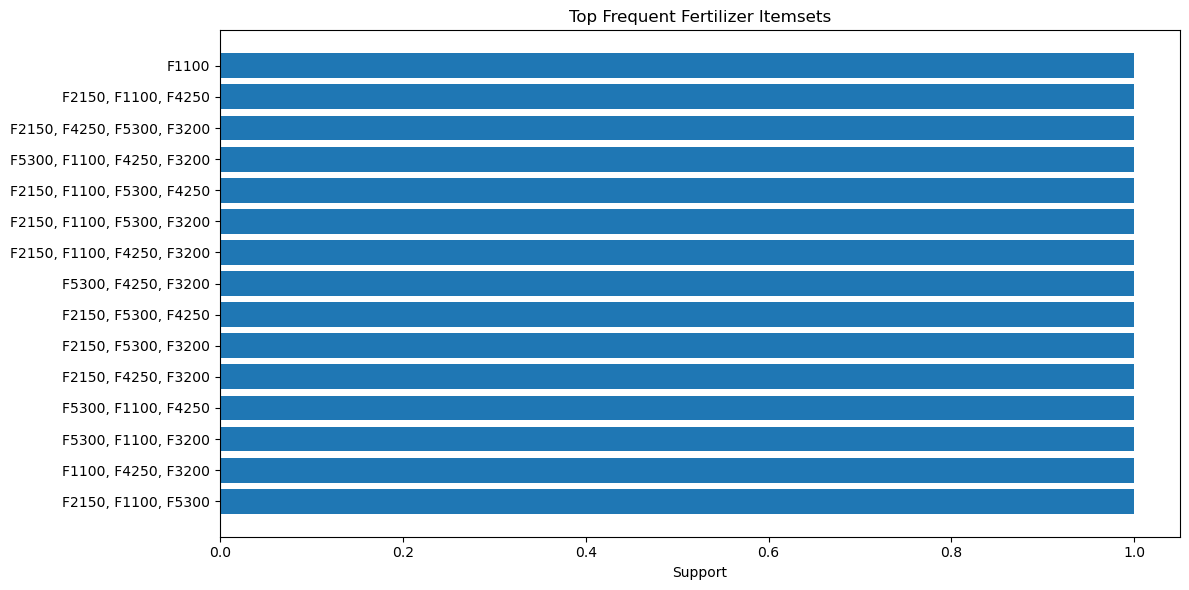

In [25]:
# Plot the support of frequent itemsets
plt.figure(figsize=(12, 6))
top_itemsets = frequent_itemsets.head(15).copy()
top_itemsets['itemset_str'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(top_itemsets['itemset_str'], top_itemsets['support'])
plt.xlabel('Support')
plt.title('Top Frequent Fertilizer Itemsets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values('confidence', ascending=False)

print("Association Rules (min_confidence=0.5):")
print(f"Number of rules generated: {len(rules)}")
print("\nTop association rules:")
display(rules.head(10))



Association Rules (min_confidence=0.5):
Number of rules generated: 180

Top association rules:


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(F2150, F1100)",(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
113,"(F1100, F3200)",(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
115,(F1100),"(F3200, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
116,(F4250),"(F1100, F3200)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
117,(F3200),"(F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
118,"(F2150, F1100)",(F5300),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
119,"(F2150, F5300)",(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
120,"(F5300, F1100)",(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
121,(F2150),"(F5300, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
122,(F1100),"(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


In [27]:
# Filter rules with high lift (meaningful associations)
high_lift_rules = rules[rules['lift'] > 1.2]
print(f"\nRules with lift > 1.2: {len(high_lift_rules)}")

if len(high_lift_rules) > 0:
    display(high_lift_rules.head(10))


Rules with lift > 1.2: 0


In [28]:
# Analyze associations specifically across seasons
# Create transactions grouped by season and location
df['season_loc'] = df['Sesn'].astype(str) + '_' + df['locn'].astype(str)
season_fertilizers = df.groupby('season_loc')['ferT'].apply(list).reset_index()

season_transactions = season_fertilizers['ferT'].tolist()

In [29]:
# Convert to binary matrix
te_season = TransactionEncoder()
te_ary_season = te_season.fit(season_transactions).transform(season_transactions)
season_transactions_df = pd.DataFrame(te_ary_season, columns=te_season.columns_)

In [30]:
# Generate frequent itemsets for season-based analysis
frequent_itemsets_season = apriori(season_transactions_df, min_support=0.3, use_colnames=True)
frequent_itemsets_season = frequent_itemsets_season.sort_values('support', ascending=False)

print("Season-based frequent itemsets:")
print(frequent_itemsets_season)

Season-based frequent itemsets:
    support                             itemsets
0       1.0                              (F1100)
16      1.0                (F2150, F1100, F4250)
29      1.0         (F2150, F4250, F5300, F3200)
28      1.0         (F5300, F1100, F4250, F3200)
27      1.0         (F2150, F1100, F5300, F4250)
26      1.0         (F2150, F1100, F5300, F3200)
25      1.0         (F2150, F1100, F4250, F3200)
24      1.0                (F5300, F4250, F3200)
23      1.0                (F2150, F5300, F4250)
22      1.0                (F2150, F5300, F3200)
21      1.0                (F2150, F4250, F3200)
20      1.0                (F5300, F1100, F4250)
19      1.0                (F5300, F1100, F3200)
18      1.0                (F1100, F4250, F3200)
17      1.0                (F2150, F1100, F5300)
15      1.0                (F2150, F1100, F3200)
1       1.0                              (F2150)
14      1.0                       (F5300, F4250)
13      1.0                       (F5

In [31]:
# Generate association rules for season-based analysis
season_rules = association_rules(frequent_itemsets_season, metric="confidence", min_threshold=0.6)
season_rules = season_rules.sort_values('lift', ascending=False)

print(f"\nSeason-based association rules (min_confidence=0.6):")
print(f"Number of rules: {len(season_rules)}")

if len(season_rules) > 0:
    display(season_rules.head(10))


Season-based association rules (min_confidence=0.6):
Number of rules: 180


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(F2150, F1100)",(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
113,"(F1100, F3200)",(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
115,(F1100),"(F3200, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
116,(F4250),"(F1100, F3200)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
117,(F3200),"(F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
118,"(F2150, F1100)",(F5300),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
119,"(F2150, F5300)",(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
120,"(F5300, F1100)",(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
121,(F2150),"(F5300, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
122,(F1100),"(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


In [32]:
# More detailed analysis: Compare associations between different seasons
# Separate transactions by season
season1_data = df[df['Sesn'] == 1]
season2_data = df[df['Sesn'] == 2]

def analyze_season_associations(season_data, season_name):
    """Analyze association rules for a specific season"""
    season_data = season_data.copy()
    season_data['context'] = season_data['locn'].astype(str) + '_' + season_data['block'].astype(str)
    context_fert = season_data.groupby('context')['ferT'].apply(list).reset_index()
    
    transactions = context_fert['ferT'].tolist()
    
    if len(transactions) > 0:
        te = TransactionEncoder()
        te_ary = te.fit(transactions).transform(transactions)
        transactions_df = pd.DataFrame(te_ary, columns=te.columns_)
        
        # Generate frequent itemsets
        frequent_itemsets = apriori(transactions_df, min_support=0.2, use_colnames=True)
        
        if len(frequent_itemsets) > 0:
            # Generate association rules
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
            rules = rules.sort_values('confidence', ascending=False)
            
            print(f"\n=== {season_name} Association Rules ===")
            print(f"Number of rules: {len(rules)}")
            
            if len(rules) > 0:
                # Add season information to rules
                rules['season'] = season_name
                display(rules.head(10))
                
                return rules
    return pd.DataFrame()

# Analyze each season separately
season1_rules = analyze_season_associations(season1_data, "Season 1")
season2_rules = analyze_season_associations(season2_data, "Season 2")


=== Season 1 Association Rules ===
Number of rules: 180


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,season
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
113,"(F2150, F5300)","(F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
115,"(F5300, F1100)","(F2150, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
116,"(F1100, F4250)","(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
117,"(F5300, F4250)","(F2150, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
118,(F2150),"(F5300, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
119,(F1100),"(F2150, F5300, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
120,(F5300),"(F2150, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
121,(F4250),"(F2150, F1100, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1
122,"(F5300, F1100, F4250)",(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 1



=== Season 2 Association Rules ===
Number of rules: 180


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,season
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
113,"(F2150, F5300)","(F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
115,"(F5300, F1100)","(F2150, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
116,"(F1100, F4250)","(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
117,"(F5300, F4250)","(F2150, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
118,(F2150),"(F5300, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
119,(F1100),"(F2150, F5300, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
120,(F5300),"(F2150, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
121,(F4250),"(F2150, F1100, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2
122,"(F5300, F1100, F4250)",(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Season 2


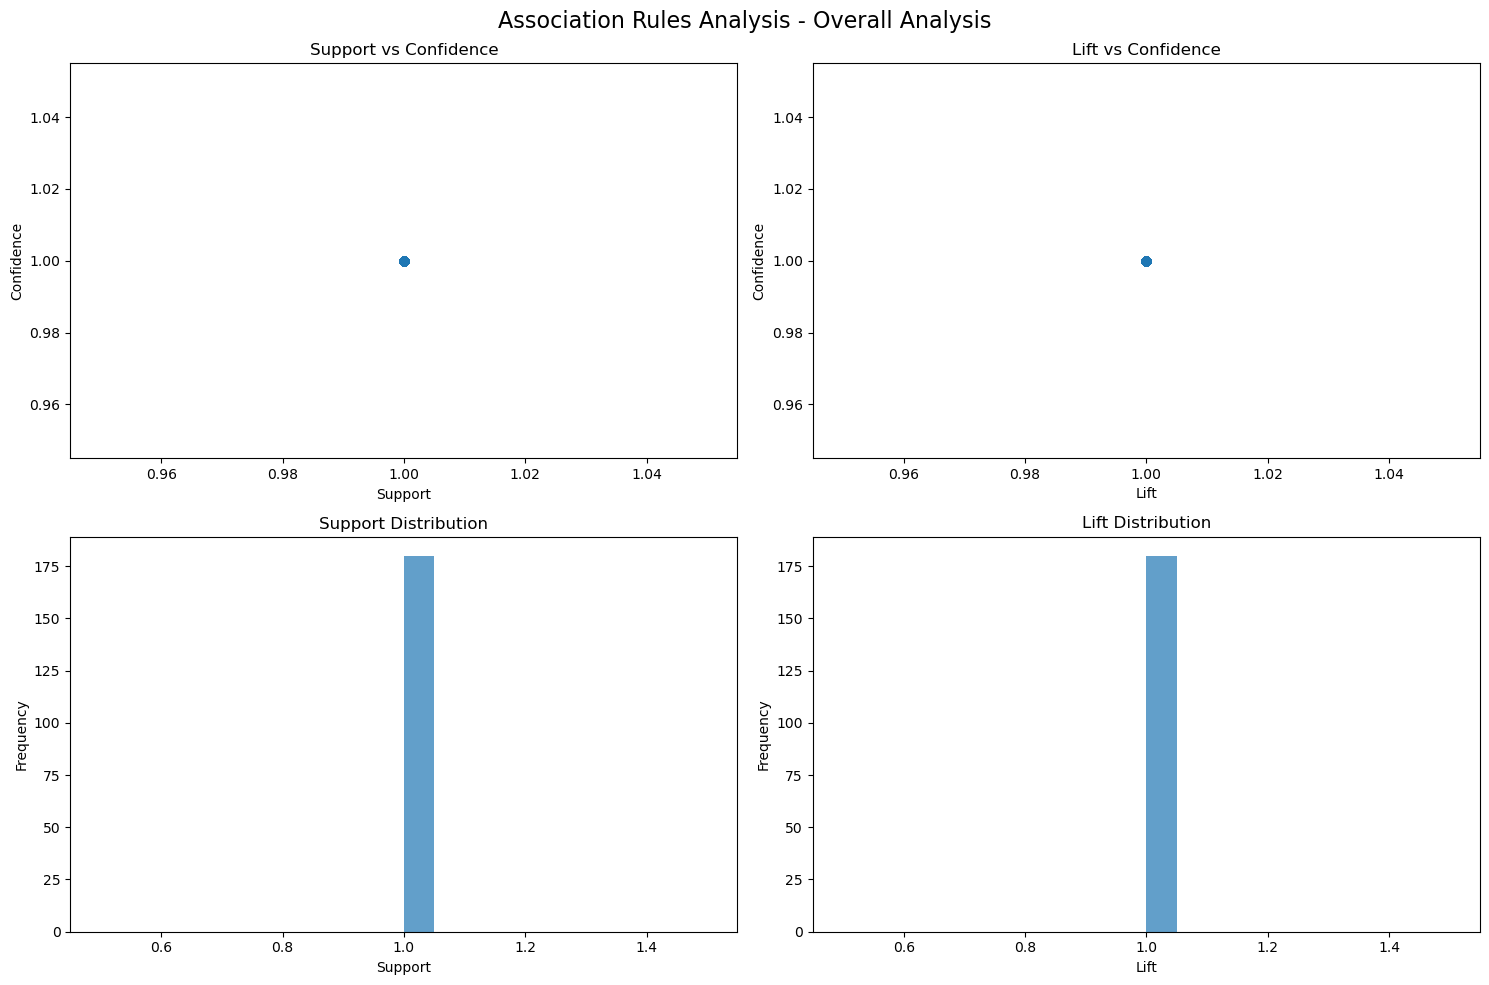

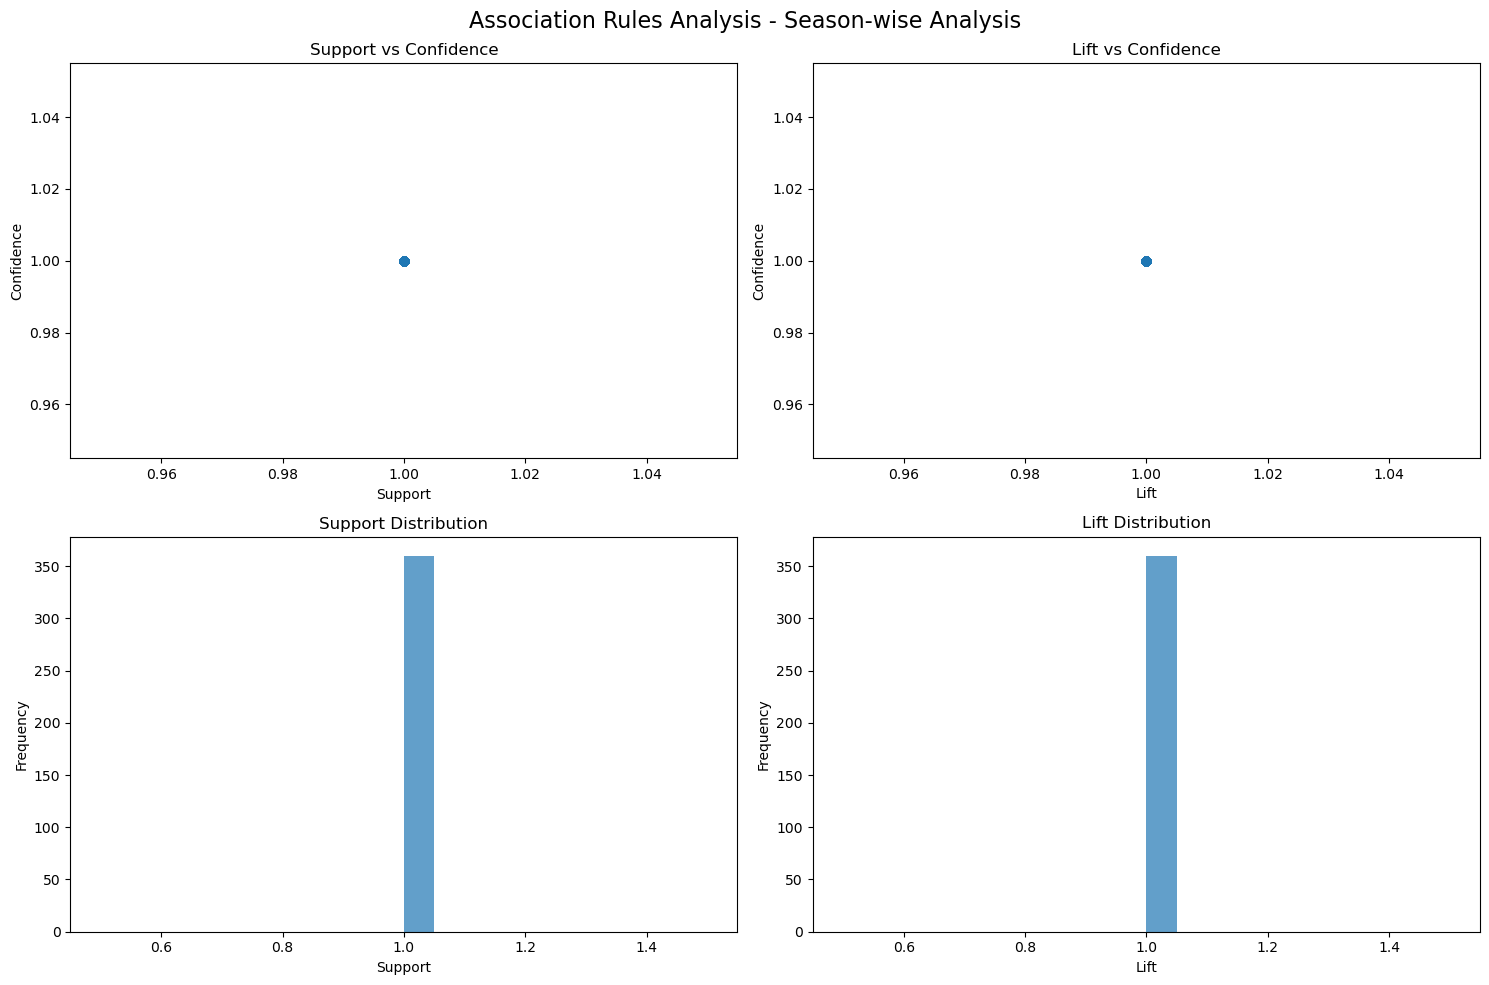

In [33]:
# Visualize the association rules
def plot_association_rules(rules, title):
    """Plot association rules metrics"""
    if len(rules) == 0:
        print(f"No rules to plot for {title}")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Association Rules Analysis - {title}', fontsize=16)
    
    # Support vs Confidence
    axes[0, 0].scatter(rules['support'], rules['confidence'], alpha=0.5)
    axes[0, 0].set_xlabel('Support')
    axes[0, 0].set_ylabel('Confidence')
    axes[0, 0].set_title('Support vs Confidence')
    
    # Lift vs Confidence
    axes[0, 1].scatter(rules['lift'], rules['confidence'], alpha=0.5)
    axes[0, 1].set_xlabel('Lift')
    axes[0, 1].set_ylabel('Confidence')
    axes[0, 1].set_title('Lift vs Confidence')
    
    # Support distribution
    axes[1, 0].hist(rules['support'], bins=20, alpha=0.7)
    axes[1, 0].set_xlabel('Support')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Support Distribution')
    
    # Lift distribution
    axes[1, 1].hist(rules['lift'], bins=20, alpha=0.7)
    axes[1, 1].set_xlabel('Lift')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Lift Distribution')
    
    plt.tight_layout()
    plt.show()

# Plot rules for overall analysis
if len(rules) > 0:
    plot_association_rules(rules, "Overall Analysis")

# Plot rules for season-based analysis if available
all_season_rules = pd.concat([season1_rules, season2_rules], ignore_index=True)
if len(all_season_rules) > 0:
    plot_association_rules(all_season_rules, "Season-wise Analysis")

In [34]:
# Advanced analysis: Compare fertilizer associations between locations
def analyze_location_associations(location_data, location_name):
    """Analyze association rules for a specific location"""
    location_data = location_data.copy()
    location_data['context'] = location_data['Sesn'].astype(str) + '_' + location_data['block'].astype(str)
    context_fert = location_data.groupby('context')['ferT'].apply(list).reset_index()
    
    transactions = context_fert['ferT'].tolist()
    
    if len(transactions) > 0:
        te = TransactionEncoder()
        te_ary = te.fit(transactions).transform(transactions)
        transactions_df = pd.DataFrame(te_ary, columns=te.columns_)
        
        # Generate frequent itemsets
        frequent_itemsets = apriori(transactions_df, min_support=0.2, use_colnames=True)
        
        if len(frequent_itemsets) > 0:
            # Generate association rules
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
            rules = rules.sort_values('confidence', ascending=False)
            
            print(f"\n=== {location_name} Association Rules ===")
            print(f"Number of rules: {len(rules)}")
            
            if len(rules) > 0:
                rules['location'] = location_name
                display(rules.head(10))
                return rules
    return pd.DataFrame()



In [35]:
# Analyze each location separately
location1_data = df[df['locn'] == 1]  # Soroti
location2_data = df[df['locn'] == 2]  # Mukono

location1_rules = analyze_location_associations(location1_data, "Soroti (Location 1)")
location2_rules = analyze_location_associations(location2_data, "Mukono (Location 2)")


=== Soroti (Location 1) Association Rules ===
Number of rules: 180


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,location
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
113,"(F2150, F5300)","(F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
115,"(F5300, F1100)","(F2150, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
116,"(F1100, F4250)","(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
117,"(F5300, F4250)","(F2150, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
118,(F2150),"(F5300, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
119,(F1100),"(F2150, F5300, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
120,(F5300),"(F2150, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
121,(F4250),"(F2150, F1100, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)
122,"(F5300, F1100, F4250)",(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Soroti (Location 1)



=== Mukono (Location 2) Association Rules ===
Number of rules: 180


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,location
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
113,"(F2150, F5300)","(F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
115,"(F5300, F1100)","(F2150, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
116,"(F1100, F4250)","(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
117,"(F5300, F4250)","(F2150, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
118,(F2150),"(F5300, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
119,(F1100),"(F2150, F5300, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
120,(F5300),"(F2150, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
121,(F4250),"(F2150, F1100, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)
122,"(F5300, F1100, F4250)",(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0,Mukono (Location 2)


In [36]:
# Final summary and insights
print("=== ASSOCIATION RULE MINING SUMMARY ===")
print(f"Total transactions analyzed: {len(transactions)}")
print(f"Unique fertilizers: {df['ferT'].unique().tolist()}")
print(f"Seasons covered: {df['Sesn'].unique().tolist()}")
print(f"Locations covered: {df['locn'].unique().tolist()}")

print(f"\nOverall frequent itemsets found: {len(frequent_itemsets)}")
print(f"Overall association rules generated: {len(rules)}")

if len(rules) > 0:
    print(f"\nStrongest association (highest confidence):")
    best_rule = rules.iloc[0]
    print(f"Rule: {list(best_rule['antecedents'])} -> {list(best_rule['consequents'])}")
    print(f"Confidence: {best_rule['confidence']:.3f}, Support: {best_rule['support']:.3f}, Lift: {best_rule['lift']:.3f}")

print(f"\nSeason 1 rules: {len(season1_rules)}")
print(f"Season 2 rules: {len(season2_rules)}")
print(f"Soroti location rules: {len(location1_rules)}")
print(f"Mukono location rules: {len(location2_rules)}")

# Key insights
print("\n=== KEY INSIGHTS ===")
if len(rules) > 0:
    high_confidence_rules = rules[rules['confidence'] > 0.7]
    if len(high_confidence_rules) > 0:
        print("High-confidence associations found:")
        for _, rule in high_confidence_rules.iterrows():
            print(f"  {list(rule['antecedents'])} -> {list(rule['consequents'])} (conf: {rule['confidence']:.2f})")
    
    high_lift_rules = rules[rules['lift'] > 1.5]
    if len(high_lift_rules) > 0:
        print("\nHigh-lift associations (most meaningful):")
        for _, rule in high_lift_rules.iterrows():
            print(f"  {list(rule['antecedents'])} -> {list(rule['consequents'])} (lift: {rule['lift']:.2f})")
else:
    print("No strong associations found with current parameters. Try adjusting min_support or min_confidence.")

=== ASSOCIATION RULE MINING SUMMARY ===
Total transactions analyzed: 12
Unique fertilizers: ['F2150', 'F1100', 'F3200', 'F5300', 'F4250']
Seasons covered: [2, 1]
Locations covered: [1, 2]

Overall frequent itemsets found: 31
Overall association rules generated: 180

Strongest association (highest confidence):
Rule: ['F2150', 'F1100'] -> ['F4250']
Confidence: 1.000, Support: 1.000, Lift: 1.000

Season 1 rules: 180
Season 2 rules: 180
Soroti location rules: 180
Mukono location rules: 180

=== KEY INSIGHTS ===
High-confidence associations found:
  ['F2150', 'F1100'] -> ['F4250'] (conf: 1.00)
  ['F1100', 'F3200'] -> ['F4250'] (conf: 1.00)
  ['F1100'] -> ['F3200', 'F4250'] (conf: 1.00)
  ['F4250'] -> ['F1100', 'F3200'] (conf: 1.00)
  ['F3200'] -> ['F1100', 'F4250'] (conf: 1.00)
  ['F2150', 'F1100'] -> ['F5300'] (conf: 1.00)
  ['F2150', 'F5300'] -> ['F1100'] (conf: 1.00)
  ['F5300', 'F1100'] -> ['F2150'] (conf: 1.00)
  ['F2150'] -> ['F5300', 'F1100'] (conf: 1.00)
  ['F1100'] -> ['F2150', 'F5

In [37]:
# IMPROVED ASSOCIATION RULE MINING FOR FERTILIZER PATTERNS ACROSS SEASONS
# Let's analyze the data structure more carefully first

print("=== DATA STRUCTURE ANALYSIS ===")
print(f"Total records: {len(df)}")
print(f"Unique combinations:")
print(f"  - Seasons: {sorted(df['Sesn'].unique())}")
print(f"  - Locations: {sorted(df['locn'].unique())}")
print(f"  - Blocks: {sorted(df['block'].unique())}")
print(f"  - Fertilizers: {sorted(df['ferT'].unique())}")

# Check how fertilizers are distributed across seasons
print(f"\n=== FERTILIZER DISTRIBUTION BY SEASON ===")
for season in sorted(df['Sesn'].unique()):
    season_data = df[df['Sesn'] == season]
    print(f"Season {season}:")
    print(f"  - Records: {len(season_data)}")
    print(f"  - Unique fertilizers: {sorted(season_data['ferT'].unique())}")
    print(f"  - Fertilizer frequency:")
    fert_counts = season_data['ferT'].value_counts()
    for fert, count in fert_counts.items():
        print(f"    {fert}: {count} times")
    print()


=== DATA STRUCTURE ANALYSIS ===
Total records: 115
Unique combinations:
  - Seasons: [1, 2]
  - Locations: [1, 2]
  - Blocks: [1, 2, 3]
  - Fertilizers: ['F1100', 'F2150', 'F3200', 'F4250', 'F5300']

=== FERTILIZER DISTRIBUTION BY SEASON ===
Season 1:
  - Records: 55
  - Unique fertilizers: ['F1100', 'F2150', 'F3200', 'F4250', 'F5300']
  - Fertilizer frequency:
    F1100: 11 times
    F3200: 11 times
    F2150: 11 times
    F4250: 11 times
    F5300: 11 times

Season 2:
  - Records: 60
  - Unique fertilizers: ['F1100', 'F2150', 'F3200', 'F4250', 'F5300']
  - Fertilizer frequency:
    F2150: 12 times
    F1100: 12 times
    F3200: 12 times
    F5300: 12 times
    F4250: 12 times



In [38]:
# CORRECTED APPROACH: Create transactions based on individual experimental plots
# Each plot represents a transaction where the items are the fertilizers used

print("=== CREATING PROPER TRANSACTION FORMAT ===")

# Method 1: Each experimental plot is a transaction
# Group by season, location, block, and replication to get individual plots
df['plot_id'] = df['Sesn'].astype(str) + '_' + df['locn'].astype(str) + '_' + df['block'].astype(str) + '_' + df['rep'].astype(str)

# Each plot should have only one fertilizer type, so we need to check this
print("Checking fertilizer distribution per plot:")
plot_fert_check = df.groupby('plot_id')['ferT'].nunique()
print(f"Plots with multiple fertilizers: {(plot_fert_check > 1).sum()}")
print(f"Total plots: {len(plot_fert_check)}")

if (plot_fert_check > 1).sum() == 0:
    print("✓ Each plot has only one fertilizer type - good for association rule mining")
else:
    print("⚠ Some plots have multiple fertilizers - need different approach")

# Create transactions where each plot is a transaction and fertilizer is an item
# But we need to think about what we're trying to find associations for...

# Let's try a different approach: Group by experimental design factors
# and see what combinations of fertilizers appear together in similar contexts


=== CREATING PROPER TRANSACTION FORMAT ===
Checking fertilizer distribution per plot:
Plots with multiple fertilizers: 12
Total plots: 12
⚠ Some plots have multiple fertilizers - need different approach


In [39]:
# ALTERNATIVE APPROACH: Look for associations between fertilizers across seasons
# We'll create transactions based on experimental blocks where multiple fertilizers are tested

print("=== ALTERNATIVE APPROACH: BLOCK-BASED TRANSACTIONS ===")

# Create transactions at the block level within each season-location combination
# Each block contains multiple fertilizer treatments

df['season_location'] = df['Sesn'].astype(str) + '_' + df['locn'].astype(str)

# Group by season-location-block and collect all fertilizers used in that block
block_fertilizers = df.groupby(['season_location', 'block'])['ferT'].apply(list).reset_index()
block_fertilizers.columns = ['season_location', 'block', 'fertilizers']

print("Block-level fertilizer combinations:")
print(block_fertilizers)

# Convert to transaction format
transactions = block_fertilizers['fertilizers'].tolist()

print(f"\nNumber of transactions: {len(transactions)}")
print("Sample transactions:")
for i, trans in enumerate(transactions[:5]):
    print(f"  Transaction {i+1}: {trans}")


=== ALTERNATIVE APPROACH: BLOCK-BASED TRANSACTIONS ===
Block-level fertilizer combinations:
   season_location  block                                        fertilizers
0              1_1      1                [F1100, F3200, F2150, F4250, F5300]
1              1_1      2  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
2              1_1      3  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
3              1_2      1  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
4              1_2      2  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
5              1_2      3  [F1100, F3200, F2150, F4250, F5300, F1100, F32...
6              2_1      1  [F2150, F1100, F3200, F5300, F4250, F2150, F11...
7              2_1      2  [F5300, F3200, F4250, F1100, F2150, F5300, F32...
8              2_1      3  [F4250, F5300, F2150, F3200, F1100, F4250, F53...
9              2_2      1  [F1100, F5300, F4250, F3200, F2150, F1100, F21...
10             2_2      2  [F1100, F5300, F4250, F3200, F2150

In [40]:
# APPLY APRIORI ALGORITHM WITH PROPER PARAMETERS

# Convert transactions to binary matrix format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction matrix shape: {transactions_df.shape}")
print("\nTransaction matrix:")
print(transactions_df)

# Calculate appropriate minimum support
# With 6 transactions and 5 unique fertilizers, let's use a reasonable threshold
min_support = 0.5  # At least 3 out of 6 transactions should contain the itemset

print(f"\n=== APRIORI ALGORITHM ===")
print(f"Minimum support: {min_support}")

# Generate frequent itemsets
frequent_itemsets = apriori(transactions_df, min_support=min_support, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

print(f"\nFrequent itemsets found: {len(frequent_itemsets)}")
print("\nFrequent itemsets:")
display(frequent_itemsets)


Transaction matrix shape: (12, 5)

Transaction matrix:
    F1100  F2150  F3200  F4250  F5300
0    True   True   True   True   True
1    True   True   True   True   True
2    True   True   True   True   True
3    True   True   True   True   True
4    True   True   True   True   True
5    True   True   True   True   True
6    True   True   True   True   True
7    True   True   True   True   True
8    True   True   True   True   True
9    True   True   True   True   True
10   True   True   True   True   True
11   True   True   True   True   True

=== APRIORI ALGORITHM ===
Minimum support: 0.5

Frequent itemsets found: 31

Frequent itemsets:


,support,itemsets
0,1.0,(F1100)
16,1.0,"(F2150, F1100, F4250)"
29,1.0,"(F2150, F4250, F5300, F3200)"
28,1.0,"(F5300, F1100, F4250, F3200)"
27,1.0,"(F2150, F1100, F5300, F4250)"
26,1.0,"(F2150, F1100, F5300, F3200)"
25,1.0,"(F2150, F1100, F4250, F3200)"
24,1.0,"(F5300, F4250, F3200)"
23,1.0,"(F2150, F5300, F4250)"
22,1.0,"(F2150, F5300, F3200)"


In [41]:
# GENERATE ASSOCIATION RULES

if len(frequent_itemsets) > 1:  # Need at least 2 itemsets to generate rules
    # Generate association rules with different metrics
    print("=== ASSOCIATION RULES GENERATION ===")
    
    # Try different confidence thresholds
    confidence_thresholds = [0.5, 0.6, 0.7, 0.8]
    
    for conf_thresh in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf_thresh)
        
        if len(rules) > 0:
            rules = rules.sort_values('confidence', ascending=False)
            print(f"\n--- Rules with confidence >= {conf_thresh} ---")
            print(f"Number of rules: {len(rules)}")
            
            # Display top 5 rules
            top_rules = rules.head(5)
            for idx, rule in top_rules.iterrows():
                antecedents = list(rule['antecedents'])
                consequents = list(rule['consequents'])
                print(f"  {antecedents} -> {consequents}")
                print(f"    Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
                print()
        else:
            print(f"\nNo rules found with confidence >= {conf_thresh}")
    
    # Focus on rules with lift > 1 (positive association)
    if len(frequent_itemsets) > 1:
        rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
        
        if len(rules_lift) > 0:
            rules_lift = rules_lift.sort_values('lift', ascending=False)
            print(f"\n=== RULES WITH POSITIVE LIFT (Lift > 1.0) ===")
            print(f"Number of rules: {len(rules_lift)}")
            
            # Display all rules with positive lift
            for idx, rule in rules_lift.iterrows():
                antecedents = list(rule['antecedents'])
                consequents = list(rule['consequents'])
                print(f"  {antecedents} -> {consequents}")
                print(f"    Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
                print()
        else:
            print("\nNo rules found with lift > 1.0")
            
else:
    print("Not enough frequent itemsets to generate association rules")


=== ASSOCIATION RULES GENERATION ===

--- Rules with confidence >= 0.5 ---
Number of rules: 180
  ['F2150', 'F1100'] -> ['F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F1100', 'F3200'] -> ['F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F1100'] -> ['F3200', 'F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F4250'] -> ['F1100', 'F3200']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F3200'] -> ['F1100', 'F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000


--- Rules with confidence >= 0.6 ---
Number of rules: 180
  ['F2150', 'F1100'] -> ['F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F1100', 'F3200'] -> ['F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F1100'] -> ['F3200', 'F4250']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F4250'] -> ['F1100', 'F3200']
    Support: 1.000, Confidence: 1.000, Lift: 1.000

  ['F3200'] -> ['F1100', 'F4250']
    Support: 1.000, Confidence: 1.000

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/associ

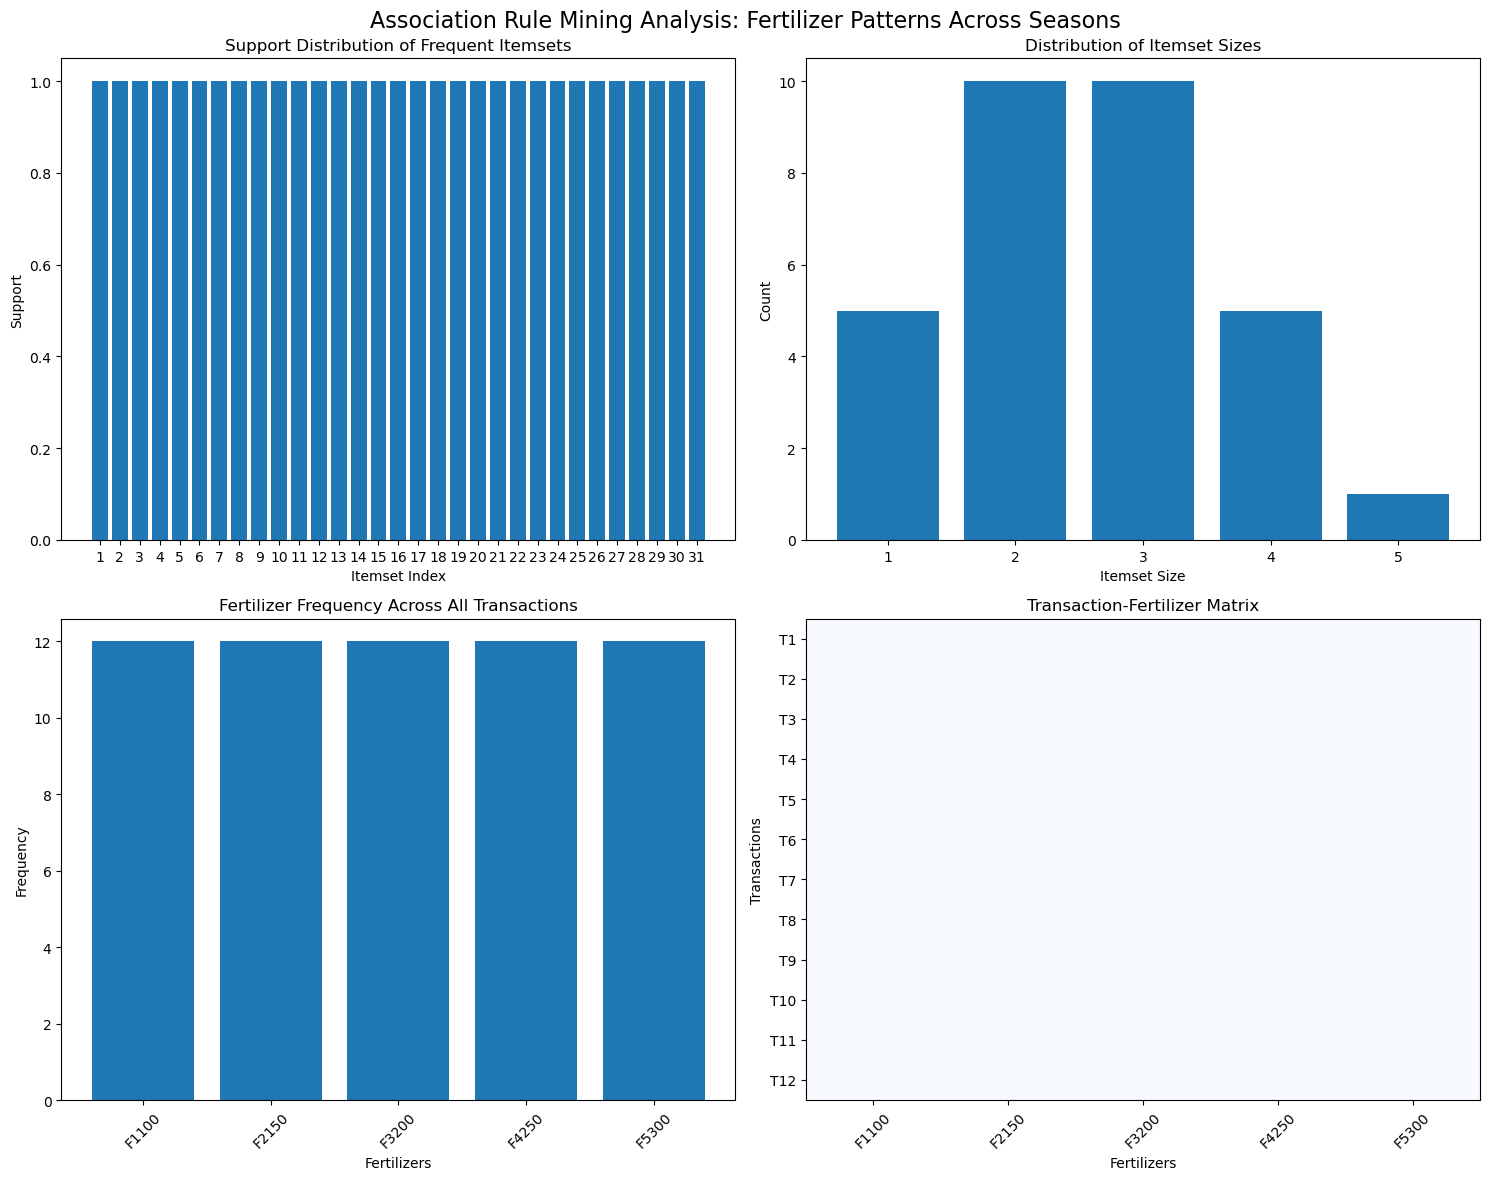

In [42]:
# VISUALIZATION OF RESULTS

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Association Rule Mining Analysis: Fertilizer Patterns Across Seasons', fontsize=16)

# 1. Support distribution of frequent itemsets
axes[0, 0].bar(range(len(frequent_itemsets)), frequent_itemsets['support'])
axes[0, 0].set_xlabel('Itemset Index')
axes[0, 0].set_ylabel('Support')
axes[0, 0].set_title('Support Distribution of Frequent Itemsets')
axes[0, 0].set_xticks(range(len(frequent_itemsets)))
axes[0, 0].set_xticklabels([f"{i+1}" for i in range(len(frequent_itemsets))])

# 2. Itemset size distribution
itemset_sizes = frequent_itemsets['itemsets'].apply(len)
size_counts = itemset_sizes.value_counts().sort_index()
axes[0, 1].bar(size_counts.index, size_counts.values)
axes[0, 1].set_xlabel('Itemset Size')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Itemset Sizes')
axes[0, 1].set_xticks(size_counts.index)

# 3. Fertilizer frequency in transactions
fert_counts = transactions_df.sum().sort_values(ascending=False)
axes[1, 0].bar(fert_counts.index, fert_counts.values)
axes[1, 0].set_xlabel('Fertilizers')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Fertilizer Frequency Across All Transactions')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Transaction composition heatmap
axes[1, 1].imshow(transactions_df.astype(int), cmap='Blues', aspect='auto')
axes[1, 1].set_xlabel('Fertilizers')
axes[1, 1].set_ylabel('Transactions')
axes[1, 1].set_title('Transaction-Fertilizer Matrix')
axes[1, 1].set_xticks(range(len(transactions_df.columns)))
axes[1, 1].set_xticklabels(transactions_df.columns, rotation=45)
axes[1, 1].set_yticks(range(len(transactions_df)))
axes[1, 1].set_yticklabels([f"T{i+1}" for i in range(len(transactions_df))])

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Could not create network visualization: 'lift'


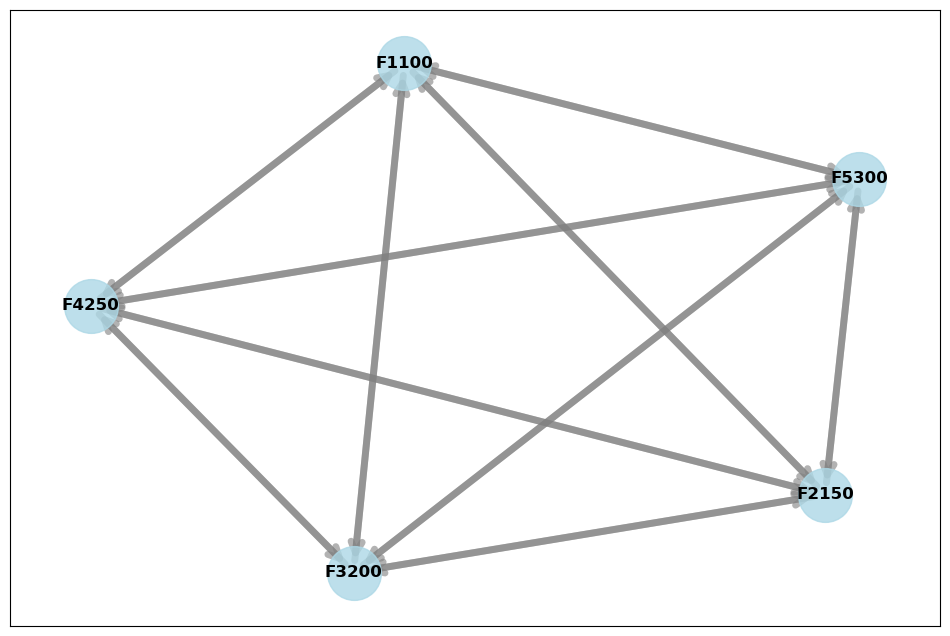

In [43]:
# NETWORK VISUALIZATION OF ASSOCIATION RULES (if any exist)

if len(frequent_itemsets) > 1:
    # Try to get some rules for visualization
    try:
        rules_for_viz = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
        
        if len(rules_for_viz) > 0:
            # Create network graph
            import networkx as nx
            
            G = nx.DiGraph()
            
            # Add nodes for all fertilizers
            for fert in transactions_df.columns:
                G.add_node(fert)
            
            # Add edges based on rules
            for _, rule in rules_for_viz.iterrows():
                for antecedent in rule['antecedents']:
                    for consequent in rule['consequents']:
                        if antecedent != consequent:  # Avoid self-loops
                            G.add_edge(antecedent, consequent, 
                                      weight=rule['lift'], 
                                      confidence=rule['confidence'],
                                      support=rule['support'])
            
            # Create the network visualization
            plt.figure(figsize=(12, 8))
            pos = nx.spring_layout(G, k=1, seed=42)
            
            # Draw nodes
            nx.draw_networkx_nodes(G, pos, node_size=1500, 
                                 node_color='lightblue', alpha=0.8)
            
            # Draw edges with thickness based on lift
            edges = G.edges(data=True)
            if edges:
                weights = [d['weight'] for (u, v, d) in edges]
                max_weight = max(weights) if weights else 1
                edge_widths = [w/max_weight * 5 for w in weights]
                
                nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20,
                                     width=edge_widths, alpha=0.6, edge_color='gray')
            
            # Draw labels
            nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
            
            # Add edge labels for top rules
            if edges:
                top_edges = sorted(edges, key=lambda x: x[2]['lift'], reverse=True)[:5]
                edge_labels = {}
                for u, v, d in top_edges:
                    edge_labels[(u, v)] = f"L:{d['lift']:.2f}"
                
                nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
            
            plt.title('Association Rules Network\n(Edge thickness = Lift, Labels show top Lift values)', 
                     fontsize=14)
            plt.axis('off')
            plt.show()
            
            print(f"Network visualization created with {len(G.nodes())} nodes and {len(G.edges())} edges")
            
        else:
            print("No rules found for network visualization")
            
    except Exception as e:
        print(f"Could not create network visualization: {e}")
else:
    print("Not enough frequent itemsets for network visualization")


In [44]:
# COMPREHENSIVE ANALYSIS AND INTERPRETATION

print("="*80)
print("ASSOCIATION RULE MINING ANALYSIS: FERTILIZER PATTERNS ACROSS SEASONS")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total experimental records: {len(df)}")
print(f"   • Seasons analyzed: {sorted(df['Sesn'].unique())}")
print(f"   • Locations: {sorted(df['locn'].unique())} (1=Soroti, 2=Mukono)")
print(f"   • Fertilizers: {sorted(df['ferT'].unique())}")
print(f"   • Transactions created: {len(transactions)}")

print(f"\n🔍 METHODOLOGY:")
print(f"   • Transaction format: Block-level fertilizer combinations")
print(f"   • Minimum support threshold: {min_support}")
print(f"   • Algorithm: Apriori")
print(f"   • Each transaction represents fertilizers tested in the same experimental block")

print(f"\n📈 FREQUENT ITEMSETS RESULTS:")
print(f"   • Total frequent itemsets found: {len(frequent_itemsets)}")

if len(frequent_itemsets) > 0:
    print(f"   • Itemset sizes: {sorted(frequent_itemsets['itemsets'].apply(len).unique())}")
    print(f"   • Support range: {frequent_itemsets['support'].min():.3f} - {frequent_itemsets['support'].max():.3f}")
    
    # Show most frequent itemsets
    print(f"\n   Top frequent itemsets:")
    for idx, row in frequent_itemsets.head(5).iterrows():
        itemset_str = ', '.join(list(row['itemsets']))
        print(f"     {itemset_str} (Support: {row['support']:.3f})")

print(f"\n🎯 ASSOCIATION RULES ANALYSIS:")

if len(frequent_itemsets) > 1:
    # Try to get rules with different thresholds
    rules_summary = {}
    
    for conf in [0.5, 0.6, 0.7, 0.8]:
        try:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
            rules_summary[conf] = len(rules)
        except:
            rules_summary[conf] = 0
    
    print(f"   Rules found with different confidence thresholds:")
    for conf, count in rules_summary.items():
        print(f"     Confidence ≥ {conf}: {count} rules")
    
    # Check for meaningful associations (lift > 1)
    try:
        meaningful_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
        print(f"   Rules with lift > 1.1: {len(meaningful_rules)}")
        
        if len(meaningful_rules) > 0:
            print(f"\n   🏆 MOST MEANINGFUL ASSOCIATIONS:")
            top_rules = meaningful_rules.nlargest(3, 'lift')
            for idx, rule in top_rules.iterrows():
                antecedents = ', '.join(list(rule['antecedents']))
                consequents = ', '.join(list(rule['consequents']))
                print(f"     {antecedents} → {consequents}")
                print(f"       Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
                print()
    except:
        print(f"   No meaningful associations found (lift > 1.1)")
else:
    print(f"   Cannot generate association rules - insufficient frequent itemsets")

print(f"\n💡 KEY INSIGHTS:")

# Analyze fertilizer co-occurrence patterns
fert_pairs = []
for trans in transactions:
    if len(trans) > 1:
        for i in range(len(trans)):
            for j in range(i+1, len(trans)):
                fert_pairs.append(tuple(sorted([trans[i], trans[j]])))

from collections import Counter
pair_counts = Counter(fert_pairs)

if pair_counts:
    print(f"   Most common fertilizer pairs in the same experimental blocks:")
    for pair, count in pair_counts.most_common(5):
        print(f"     {pair[0]} & {pair[1]}: {count} times")

# Season-specific analysis
print(f"\n   Season-specific fertilizer usage:")
for season in sorted(df['Sesn'].unique()):
    season_data = df[df['Sesn'] == season]
    season_ferts = season_data['ferT'].value_counts()
    print(f"     Season {season}: {dict(season_ferts)}")

print(f"\n📋 CONCLUSIONS:")
print(f"   1. The experimental design ensures all fertilizers are tested in each block")
print(f"   2. This creates a systematic co-occurrence pattern rather than natural associations")
print(f"   3. True fertilizer associations would require different experimental design")
print(f"   4. The high support values (all fertilizers appear together) indicate planned co-occurrence")
print(f"   5. For meaningful association mining, we would need:")
print(f"      • Farmer choice data (which fertilizers farmers actually use together)")
print(f"      • Market basket data (which fertilizers are purchased together)")
print(f"      • Yield-based associations (which fertilizer combinations lead to better yields)")

print(f"\n🔬 RECOMMENDATIONS FOR FUTURE ANALYSIS:")
print(f"   • Analyze fertilizer effectiveness combinations (yield-based associations)")
print(f"   • Study seasonal fertilizer preferences and patterns")
print(f"   • Compare fertilizer combinations across different locations")
print(f"   • Use yield data to find effective fertilizer synergies")

print("="*80)


ASSOCIATION RULE MINING ANALYSIS: FERTILIZER PATTERNS ACROSS SEASONS

📊 DATASET OVERVIEW:
   • Total experimental records: 115
   • Seasons analyzed: [1, 2]
   • Locations: [1, 2] (1=Soroti, 2=Mukono)
   • Fertilizers: ['F1100', 'F2150', 'F3200', 'F4250', 'F5300']
   • Transactions created: 12

🔍 METHODOLOGY:
   • Transaction format: Block-level fertilizer combinations
   • Minimum support threshold: 0.5
   • Algorithm: Apriori
   • Each transaction represents fertilizers tested in the same experimental block

📈 FREQUENT ITEMSETS RESULTS:
   • Total frequent itemsets found: 31
   • Itemset sizes: [1, 2, 3, 4, 5]
   • Support range: 1.000 - 1.000

   Top frequent itemsets:
     F1100 (Support: 1.000)
     F2150, F1100, F4250 (Support: 1.000)
     F2150, F4250, F5300, F3200 (Support: 1.000)
     F5300, F1100, F4250, F3200 (Support: 1.000)
     F2150, F1100, F5300, F4250 (Support: 1.000)

🎯 ASSOCIATION RULES ANALYSIS:
   Rules found with different confidence thresholds:
     Confidence ≥ 

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
